# Case - Tratando dados e definindo KPIs para uma Loja de Varejo


## Introdução

Uma loja de varejo deseja criar algumas métricas para acompanhar seus resultados. Para tal, ela disponibiliza de duas bases de dados: uma de vendas e outra de clientes.

## Objetivo do Projeto

O objetivo do projeto é fazer todo o tratamento e união das bases para construção das seguintes métricas de negócio:
* Departamentos mais vendidos;
* Média de preço com frete por Nome de Departamento;
* Quantidade de vendas por mês;
* Média de renda dos clientes para cada tipo de canal de venda;
* Média de idade de clientes por bandeira.

## Premissas de negócio

- Tem-se um erro de sistema: para compras sem UF, considere o estado do MS;
- Preço não pode ser maior que o preço com frete.

## Análise dos dados:

In [34]:
import pandas as pd
import seaborn as sns

In [35]:
vendas = pd.read_excel("varejo.xlsx")

In [36]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [37]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Analisando a distribuição dos dados da coluna 'idcanalvenda',

In [38]:
vendas['idcanalvenda'].value_counts()

idcanalvenda
Mobile        28087
Internet      27907
Aplicativo    24095
APP             139
Name: count, dtype: int64

Percebe-se que temos dados 'APP' e 'Aplicativo'. Como se referem a mesma coisa, é de boa prática unir estes dados em um só. Para tal, vamos substituir os dados 'APP' por Aplicativo,

In [39]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')

In [40]:
vendas['idcanalvenda'].value_counts()

idcanalvenda
Mobile        28087
Internet      27907
Aplicativo    24234
Name: count, dtype: int64

Portanto, agora a coluna 'Aplicativo' englobou os dados que anteriormente eram 'APP'.

Verificando agora a coluna 'bandeira',

In [41]:
vendas['bandeira'].value_counts()

bandeira
B    48048
A    32180
Name: count, dtype: int64

Para a coluna 'Nome_Departamento',

In [42]:
vendas['Nome_Departamento'].value_counts()

Nome_Departamento
Telefones e Celulares     15589
Eletrodomesticos          11058
Eletroportateis           10100
TVs e Acessorios           5496
Informatica                5438
Beleza e Saude             4733
Bebes                      4630
Moveis                     4276
Utilidades Domesticas      3791
Acessorios e Inovacoes     3623
Audio                      1808
Tablets                    1784
Brinquedos                 1327
Ferramentas                1121
Ar e Ventilacao             956
Automotivo                  904
Games                       769
Produtos de Limpeza         718
Perfumaria                  625
Esporte e Lazer             532
Casa e Construcao           264
Cama, Mesa e Banho          153
Decoracao                   134
Relogios                    134
Malas e Mochilas            114
Linha Industrial             86
Pet Shop                     43
Cine e Foto                  11
TV e Video                    5
Moda                          3
Alimentos             

De boa prática, é aconselhável substituir os espaços " " em uma string por underline "_" . Vamos fazer isso para esta coluna acima,

In [43]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(" ", "_")

In [44]:
vendas['Nome_Departamento'].value_counts()

Nome_Departamento
Telefones_e_Celulares     15589
Eletrodomesticos          11058
Eletroportateis           10100
TVs_e_Acessorios           5496
Informatica                5438
Beleza_e_Saude             4733
Bebes                      4630
Moveis                     4276
Utilidades_Domesticas      3791
Acessorios_e_Inovacoes     3623
Audio                      1808
Tablets                    1784
Brinquedos                 1327
Ferramentas                1121
Ar_e_Ventilacao             956
Automotivo                  904
Games                       769
Produtos_de_Limpeza         718
Perfumaria                  625
Esporte_e_Lazer             532
Casa_e_Construcao           264
Cama,_Mesa_e_Banho          153
Decoracao                   134
Relogios                    134
Malas_e_Mochilas            114
Linha_Industrial             86
Pet_Shop                     43
Cine_e_Foto                  11
TV_e_Video                    5
Moda                          3
Alimentos             

### Tratamento dos dados nulos

In [45]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Percebe-se que nas colunas 'Preço' e 'estado' não temos todas as entradas preenchidas com dados não nulos.

Caso quiséssemos eliminar as linhas com dados nulos,

In [46]:
vendas_sem_nulos = vendas.dropna()

In [47]:
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


Sabendo a nossa premissa de negócio, vamos substituir os dados nulos da coluna 'estado' por MS.

In [48]:
vendas['estado'] = vendas['estado'].fillna('MS')

In [49]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Caso quiséssemos substituir os dados nulos da coluna 'Preço' pela média dos preços, podemos fazer da seguinte forma:

In [50]:
media_preco = vendas['Preço'].mean()

In [51]:
vendas['Preço'].fillna(media_preco, inplace = True)

In [52]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Agora não temos mais dados nulos em nossa base.

### Filtrando os dados

In [53]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


Sabendo a nossa segunda premissa de negócio que diz que o preço não pode ser maior que o preço com frete, vamos eliminar as linhas da base de dados onde isto não ocorre.

In [54]:
vendas_errado = vendas[((vendas['Preço']) > (vendas['Preço_com_frete']))]

In [55]:
vendas_correto = vendas[((vendas['Preço']) < (vendas['Preço_com_frete']))]

Assim, a nossa base principal de dados vai ser agora a 'vendas_correto' pois garantimos que ali só existem dados em que o preço é menor que o preço com frete.

In [56]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [57]:
vendas_correto[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


Percebe-se que, o que antes era uma base de 80228 entradas, passa a ser uma nova base de dados corretos com 22047 entradas. Logo, tínhamos muitos dados errados.

## Elaborando as métricas:

### Departamentos mais vendidos

Para saber quais os departamentos que mais vendem, vamos acessar a quantidade com que cada um aparece em nossa base correta, ordenando os valores da maior para a menor quantidade.

In [58]:
vendas_correto['Nome_Departamento'].value_counts().sort_values(ascending = False)

Nome_Departamento
Bebes                     4448
Eletrodomesticos          4274
Eletroportateis           2249
Moveis                    2053
Utilidades_Domesticas     1379
Acessorios_e_Inovacoes    1251
Beleza_e_Saude            1059
Brinquedos                 686
Perfumaria                 563
Produtos_de_Limpeza        522
Telefones_e_Celulares      495
Automotivo                 459
Esporte_e_Lazer            447
Audio                      374
Ar_e_Ventilacao            339
Ferramentas                288
Informatica                284
Games                      200
TVs_e_Acessorios           158
Decoracao                  127
Malas_e_Mochilas            91
Cama,_Mesa_e_Banho          71
Tablets                     64
Casa_e_Construcao           58
Relogios                    45
Pet_Shop                    40
Linha_Industrial             9
Cine_e_Foto                  8
Moda                         3
Alimentos                    2
Instrumentos_Musicais        1
Name: count, dtype: i

Portanto, o top3 departamentos com mais itens vendidos são:
* Bebe = 4448 itens;
* Eletrodométiscos = 4274 itens;
* Eletroportáteis = 2249 itens.

### Média de preço com frete por nome de departamento

Para calcular esta métrica, vamos agrupar a média do preço com frete por cada departamento. Vamos ordenar o resultado do maior para o menor.

In [59]:
agg_media_preco_departamento = vendas_correto.groupby(by = 'Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending = False).reset_index()
agg_media_preco_departamento

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.378177
1,Informatica,2159.782620
2,Linha_Industrial,2027.106667
3,Cine_e_Foto,1851.198000
4,Telefones_e_Celulares,1442.185907
5,Eletrodomesticos,1400.662596
6,Esporte_e_Lazer,1123.139383
7,Tablets,1100.233625
8,Games,942.895360
9,Instrumentos_Musicais,834.608000


Vamos aplicar a função round( ) no código acima para arredondar os resultados em duas casas decimais,

In [60]:
round(vendas_correto.groupby(by = 'Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending = False).reset_index(), 2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


### Quantidade de vendas por mês

Primeiro vamos acessar a quantidade vendida por dia,

In [61]:
vendas_correto['Data'].value_counts()

Data
2023-02-13    226
2023-01-20    218
2023-03-07    215
2023-02-20    214
2023-03-30    214
             ... 
2023-02-15    162
2023-03-28    162
2023-02-25    161
2023-02-22    156
2023-02-12    152
Name: count, Length: 119, dtype: int64

Agora para acessar a quantidade vendida por mês, primeiro vamos criar uma nova coluna em nosso dataset para os meses do ano,

In [ ]:
vendas_correto['mês'] = vendas_correto['Data'].dt.month

In [63]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


Agora, para acessar a quantidade vendida por mês, basta visualizarmos a distruibuição dos dados em nossa nova coluna 'mês',

In [64]:
vendas_correto['mês'].value_counts()

mês
3    5733
4    5590
1    5458
2    5266
Name: count, dtype: int64

### Média de renda dos clientes para cada tipo de canal de venda

Primeiro vamos importar a segunda base de dados dos clientes,

In [65]:
clientes = pd.read_excel('cliente_varejo.xlsx')

In [66]:
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


Vamos verificar se o dataset de clientes apresenta dados nulos, utilizando a função info()

In [67]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


Percebe-se que não tem-se dados nulos.

Convertendo a coluna 'renda' para o tipo float,

In [68]:
clientes['renda'] = clientes['renda'].astype('float')

In [69]:
clientes.dtypes

cliente_Log      int64
idade            int64
renda          float64
dtype: object

Relembrando o primeiro dataset,

In [70]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


Unindo a tabela de clientes a tabela de vendas,

In [71]:
vendas_cliente = vendas_correto.merge(clientes, how = 'right', on = ['cliente_Log'])

In [72]:
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,457880.0,Aplicativo,A,2023-02-10,1079.20,1190.400,Moveis,MG,15042,2.0,89,11337.0
1,335475.0,Aplicativo,B,2023-04-25,2799.20,2815.120,Informatica,RJ,15042,4.0,89,11337.0
2,380955.0,Internet,A,2023-01-14,135.92,137.512,Bebes,SP,17590,1.0,54,2050.0
3,437305.0,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3.0,47,8258.0
4,452270.0,Aplicativo,A,2023-02-14,1199.20,1207.120,Eletrodomesticos,RJ,15478,2.0,47,8258.0


Calculando a média de renda dos clientes agrupados pelos canais de venda,

In [73]:
media_renda = round(vendas_cliente.groupby(by = 'idcanalvenda')['renda'].agg('mean').sort_values(ascending = False),2)

In [74]:
media_renda.reset_index()

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


### Média de idade dos clientes por bandeira

In [75]:
media_idade = round(vendas_cliente.groupby(by = 'bandeira')['idade'].agg('mean').sort_values(ascending = False),2).reset_index()

In [76]:
media_idade

,bandeira,idade
0,A,53.30
1,B,53.29


## Gráficos das métricas:

### Matplotlib.pyplot

Importando a biblioteca matplotlib.pyplot para fazermos os gráficos,

In [77]:
import matplotlib.pyplot as plt

#### Gráfico das médias de idades por bandeira de venda

<Figure size 1000x800 with 0 Axes>

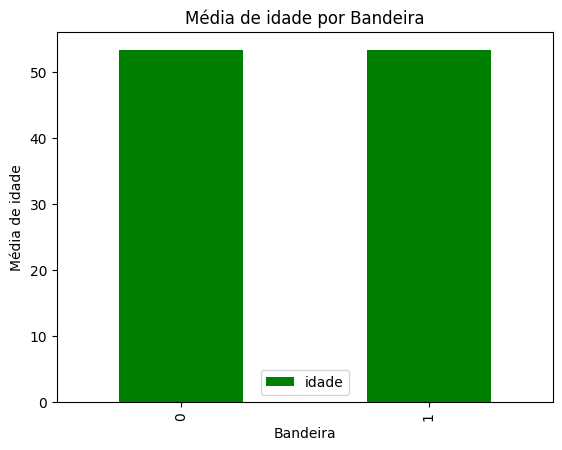

In [78]:
plt.figure(figsize = (10,8))
media_idade.plot(kind = 'bar', color = 'green')
plt.xlabel('Bandeira')
plt.ylabel('Média de idade')
plt.title('Média de idade por Bandeira', loc = 'center', color = 'black')
plt.show()

#### Gráfico da média de renda dos clientes por canal de venda

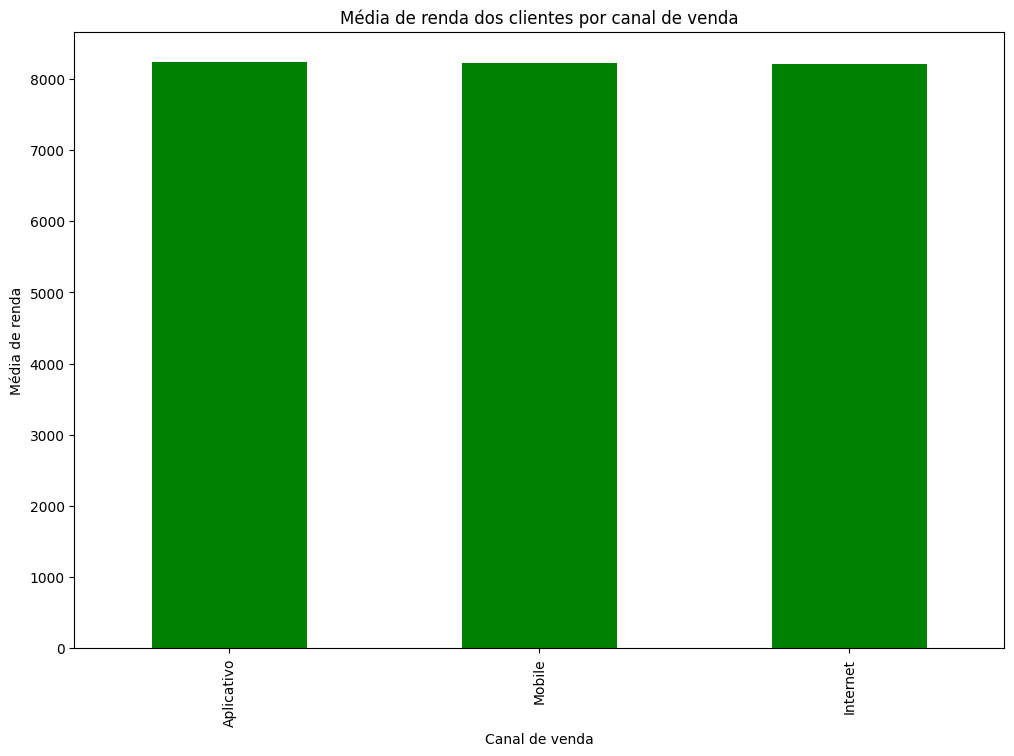

In [79]:
plt.figure(figsize = (12,8))
media_renda.plot(kind = 'bar', color = 'green')
plt.xlabel('Canal de venda')
plt.ylabel('Média de renda')
plt.title('Média de renda dos clientes por canal de venda', loc = 'center')
plt.show()

#### Gráfico da quantidade de vendas por data

Avaliando a quantidade de vendas por data,

In [80]:
vendas_por_data = vendas_correto.groupby(by = 'Data')['idcompra'].agg('count').reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,189
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,201
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


Plotando um gráfico de linha da quantidade de vendas por data,

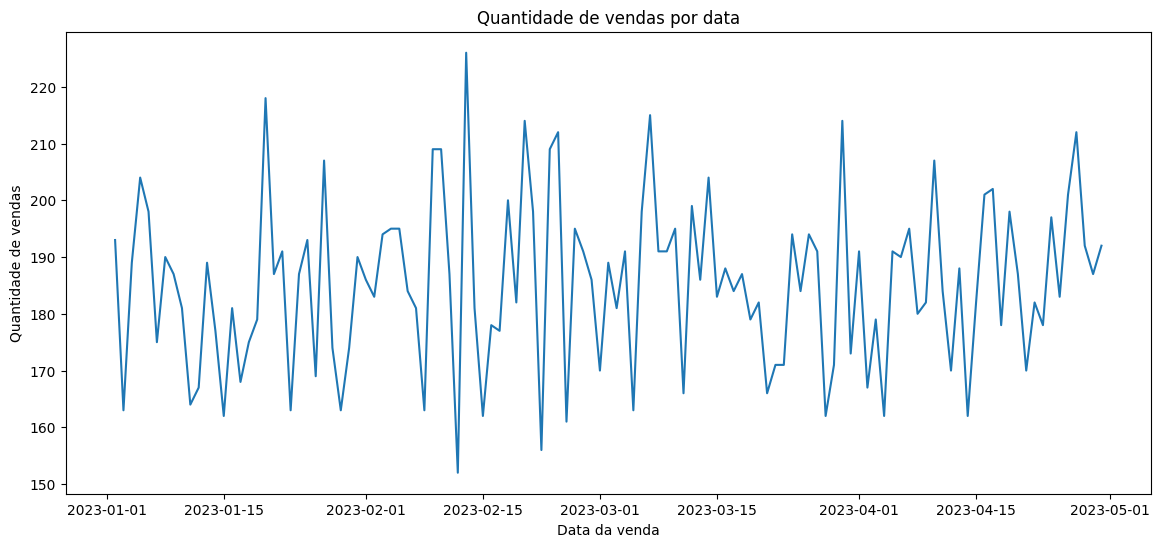

In [81]:
plt.figure(figsize = (14,6))
x = vendas_por_data['Data']
y = vendas_por_data['idcompra']
plt.plot(x, y)
plt.xlabel('Data da venda')
plt.ylabel('Quantidade de vendas')
plt.title('Quantidade de vendas por data', loc = 'center')
plt.show()

#### Gráfico média de preço com frete por departamento

In [82]:
agg_media_preco_departamento.head()

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.378177
1,Informatica,2159.782620
2,Linha_Industrial,2027.106667
3,Cine_e_Foto,1851.198000
4,Telefones_e_Celulares,1442.185907


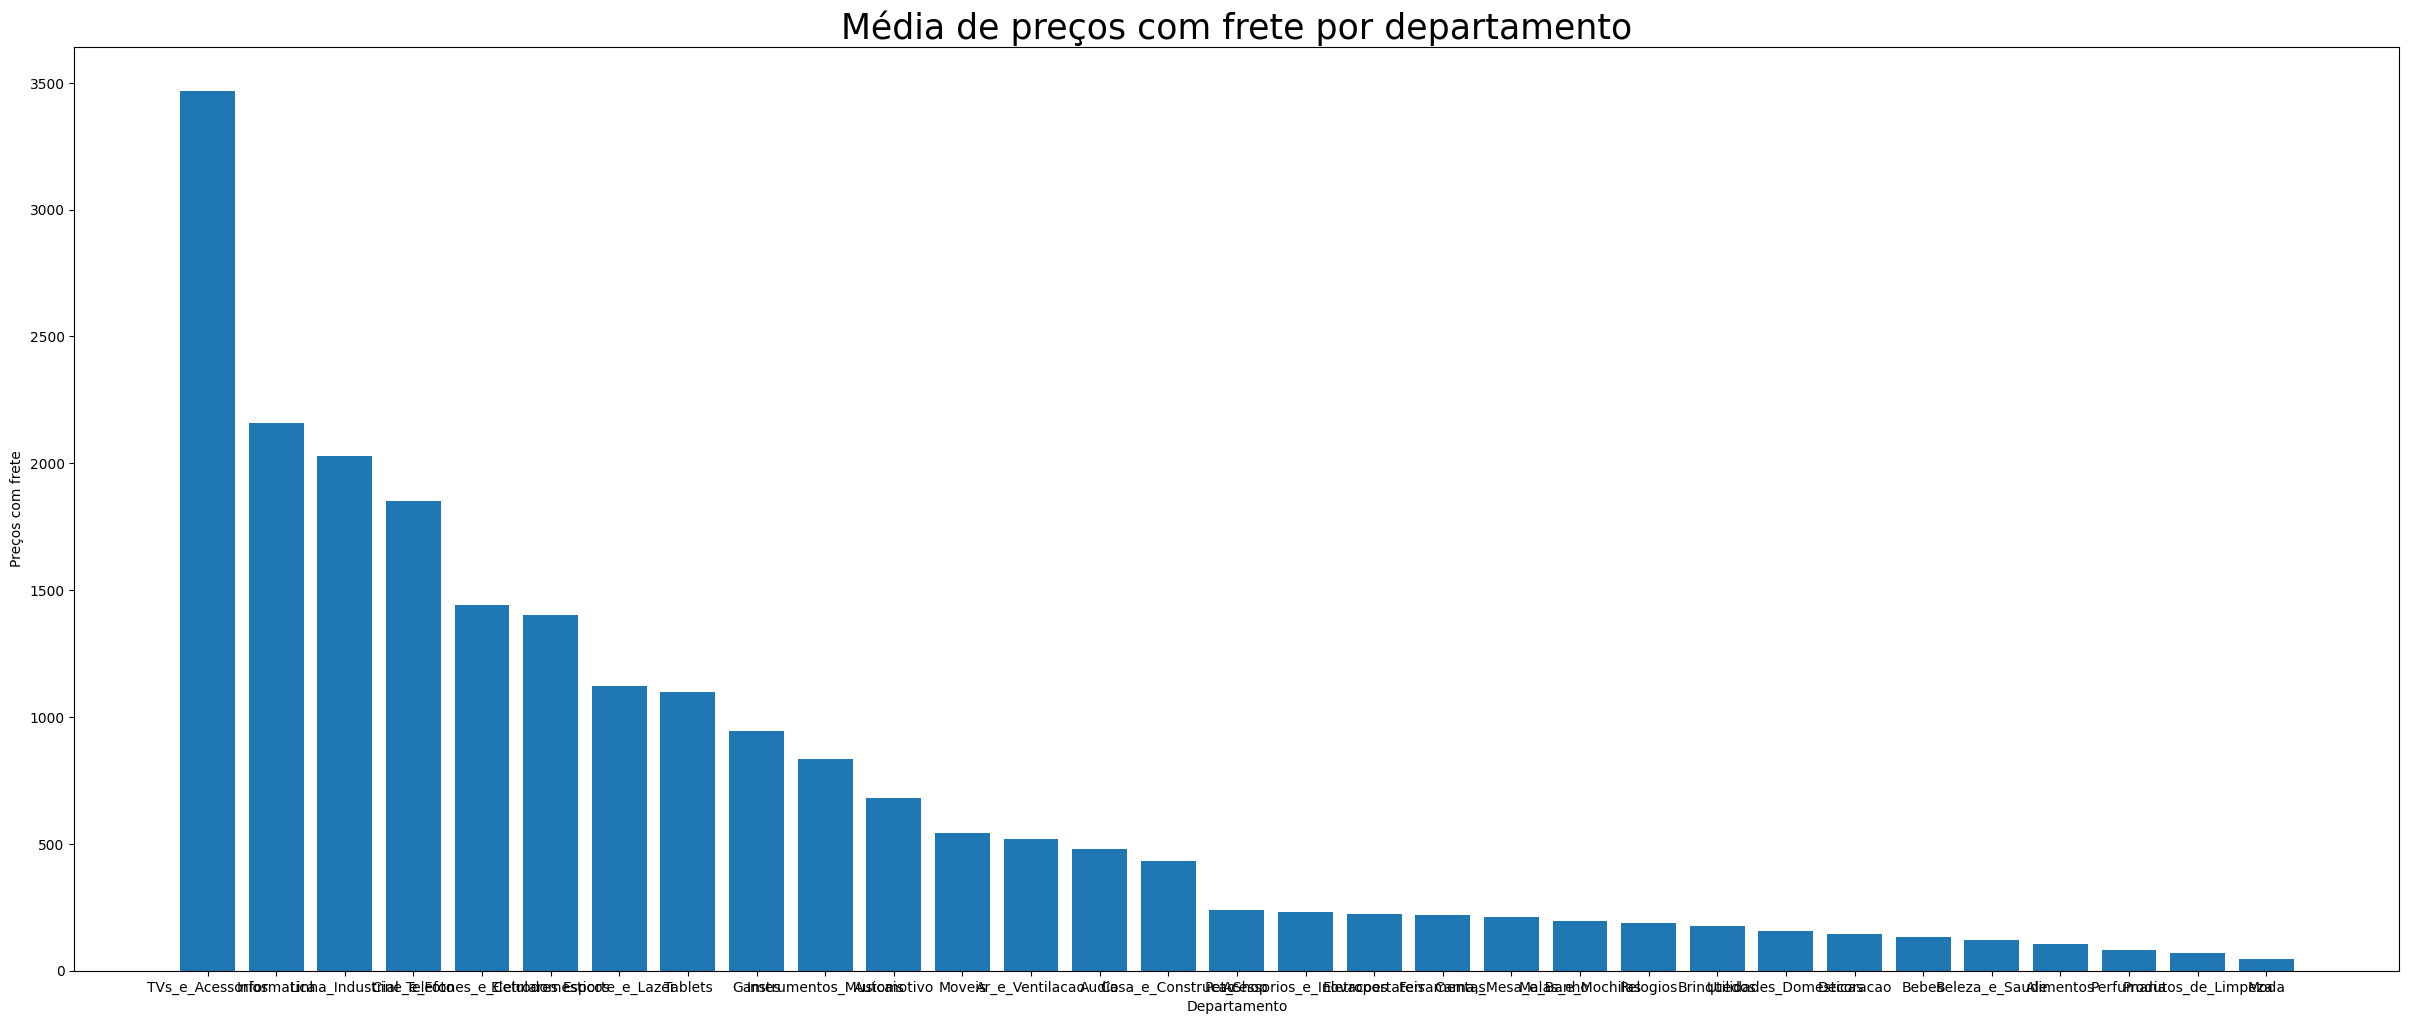

In [83]:
plt.figure(figsize = (30,12))
x = agg_media_preco_departamento['Nome_Departamento']
y = agg_media_preco_departamento['Preço_com_frete']
plt.bar(x, y)
plt.xlabel('Departamento')
plt.ylabel('Preços com frete')
plt.title('Média de preços com frete por departamento', loc = 'center', fontsize = 25)
plt.show()

### Plotly

Instalando a biblioteca plotly

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

Importando as bibliotecas instaladas anteriormente,

In [85]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

#### Gráfico média de idades por bandeira

In [86]:
px.bar(media_idade, x = 'bandeira', y = 'idade')

#### Gráfico de quantidade de vendas por data

In [87]:
px.line(vendas_por_data, x = 'Data', y = 'idcompra')

#### Gráfico de preço médio com frete por departamento

In [88]:
px.bar(agg_media_preco_departamento, x = 'Nome_Departamento', y = 'Preço_com_frete')